In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('..')

from qenv import Denoiser, Compare
import json
import numpy as np

key_path = "../res/qiskit_apikey.json"
with open(key_path, 'r') as f:
    APIkey = json.load(f)['key']

### Mock data

In [2]:
cmp = Compare(seed=8)

In [3]:
X = [
    [0, 1, 0, 0.99],
    [1, 0, 0.99, 0.2],
    [1, 0, 0.99, 0.1],
    [1, 0, 0.99, 0.05],
    [1, 0, 0.99, 0.002],
    [1, 0, 1, 0],
]

Y = [0.23, 0.43, 0.3]

DT: 0.198287 (0.035807)
RD: 0.257792 (0.100581)
LA: 0.249452 (0.100864)
EN: 0.249452 (0.100864)


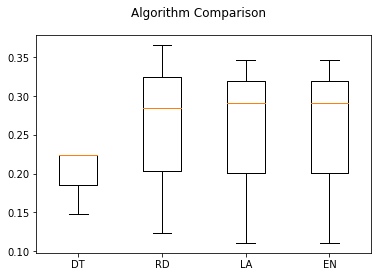

In [4]:
cmp.run(X, Y, n_splits_val=3, plot=True)

### Real experiment

In [10]:
n_qubits = 1
denoiser = Denoiser(n_qubits, APIkey)

psi = [1, 0]
theta = [(np.pi / 4,
          1,
          1)]
dist = denoiser.get_dist(psi, theta)
dist

'An IBM Q Experience v2 account is already enabled.'


[0.2594, 0.7406]

In [11]:
cmp = Compare(seed=8)

X = list()
Y = list()

for i in range(6):
    exp_list = list()
    exp_list.extend(psi)
    exp_list.extend(dist)
    
    X.append(exp_list)
    # FIX: Don't know what parameters to pass here
#     Y.append(theta[0][0])
    Y.extend(list(theta[0]))

# cmp.run(X, Y, n_splits_val=3, plot=True)

In [12]:
Y

[0.7853981633974483,
 1,
 1,
 0.7853981633974483,
 1,
 1,
 0.7853981633974483,
 1,
 1,
 0.7853981633974483,
 1,
 1,
 0.7853981633974483,
 1,
 1,
 0.7853981633974483,
 1,
 1]